In [1]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");
include("/home/jm2386/Active_Lattice/src/pm_plot.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");


v3.0
v4.0


In [150]:
Pe = 7.5
filename = "/store/DAMTP/jm2386/Active_Lattice/data/binodal/Pe=$(Pe).jld2"
data = wload(filename)
@unpack Pe, γs, ϕ1s, ϕ2s = data

Dict{String, Any} with 6 entries:
  "γs"         => Any[1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09…
  "average_ϕs" => [0.553688, 0.55902, 0.564252, 0.569386, 0.574425, 0.579373, 0…
  "ϕ1s"        => Any[0.161049, 0.171849, 0.18245, 0.192858, 0.203078, 0.213116…
  "χs"         => [1.0, 0.992112, 0.984555, 0.977312, 0.970365, 0.9637, 0.95730…
  "Pe"         => 7.5
  "ϕ2s"        => Any[0.946328, 0.946191, 0.946053, 0.945914, 0.945773, 0.94563…

In [22]:
ϕ = 0.8480768757302081; γ = 1.88
ϕa = 1 - (1-ϕ)*γ

0.7143845263727913

In [11]:
ϕ = 0.8339314317848624; γ = 2.0
ϕa = 1 - (1-ϕ)*γ


0.6678628635697248

In [26]:
w1 = find_zero(x->relambw(x; ϕa = ϕa, ϕ = ϕ, v = v0), (0.5,4))


2.3924543932157247

In [27]:
relambw(w1; ϕa = ϕa, ϕ = ϕ, v = v0) - relambw2(w1; ϕa = ϕa, ϕ = ϕ, v = v0)

0.001041626483633093

In [13]:
ϕ, ϕa

(0.8339314317848624, 0.6678628635697248)

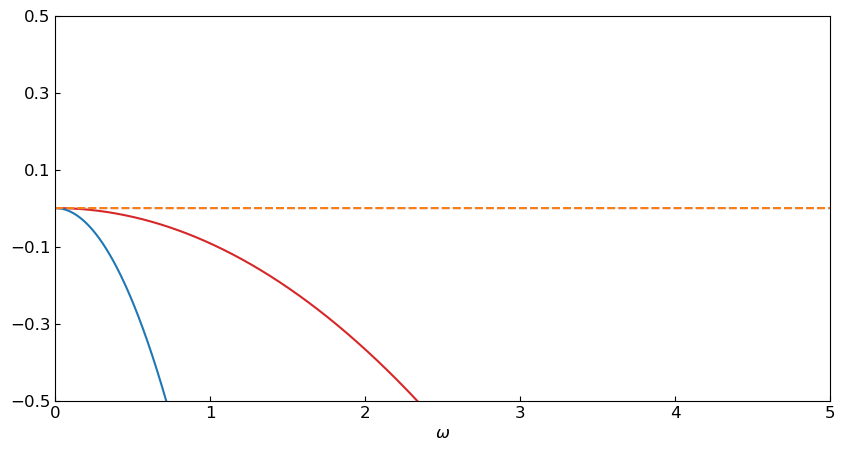

In [14]:
# ϕ, ϕa, v0 = 0.75, 0.15, 20.0
# ϕ, ϕa, v0 = 0.8, 0.3, 20.0
# ϕ, ϕa, v0 = 0.8, 0.7, 7.5; ax_lims = [0,10,-3,5] # real at zero 
# ϕ, ϕa, v0 = 0.8, 0.6, 7.5; ax_lims = [0,3,-1,1] # complex at zero 
# ϕ, ϕa, v0 = 0.7603862858921833, 0.6166180574274932, 7.5; ax_lims = [0,4,-1,1] # γ = 1.6 transition?
v0 = 0.75
using PyPlot
fig, ax = subplots(1,1,figsize=(10,5))
ax_lims = [0,5,-0.5,0.5]
plt_eigens!(ax,ϕ, ϕa, v0,ax_lims,12)

    # λs = imlambw3.(ws; ϕa = ϕa, ϕ = ϕ, v = v0) #./ws.^2
    # ax.plot(ws,λs; linestyle = "--")

    # im_discrim(w; ϕa = ϕa, ϕ = ϕ, v = v0) = discriminant_f(ϕ, ϕa, v0, w, ds(ϕ), dsp(ϕ))
    # ax.plot(ws,im_discrim.(ws; ϕa = ϕa, ϕ = ϕ, v = v0))

    # u1w(w; ϕa = ϕa, ϕ = ϕ, v = v0) = imag(u1(complex.([ϕ, ϕa, v, w, ds(ϕ), dsp(ϕ)])...)^(1/3))
    # ax.plot(ws,u1w.(ws; ϕa = ϕa, ϕ = ϕ, v = v0))

    # u2w(w; ϕa = ϕa, ϕ = ϕ, v = v0) = imag(u2(complex.([ϕ, ϕa, v, w, ds(ϕ), dsp(ϕ)])...)^(1/3))
    # ax.plot(ws,u2w.(ws; ϕa = ϕa, ϕ = ϕ, v = v0))

    # ax.plot(ws,u1w.(ws; ϕa = ϕa, ϕ = ϕ, v = v0)/ϕ^2-u2w.(ws; ϕa = ϕa, ϕ = ϕ, v = v0)/ϕ^2)

    # ax.plot(ws,-u1w.(ws; ϕa = ϕa, ϕ = ϕ, v = v0)/ϕ^2+u2w.(ws; ϕa = ϕa, ϕ = ϕ, v = v0)/ϕ^2)

    # f(x) = Dw(ϕ, ϕa, v0, x, ds(ϕ), dsp(ϕ))*Dw2(ϕ, ϕa, v0, x, ds(ϕ), dsp(ϕ))*Dw3(ϕ, ϕa, v0, x, ds(ϕ), dsp(ϕ))
    # ws = find_zeros(f,(1e-10,10))
    # λs = relambw.(ws; ϕa = ϕa, ϕ = ϕ, v = v0) #./ws.^2
    # ax.scatter(ws,λs; marker = "x")

display(fig)

In [25]:
function plt_eigens!(ax,ϕ, ϕa, v0,ax_lims,font; inc = 0.5)
    ws = collect(0.00:0.001:10)

    λs = relambw.(ws; ϕa = ϕa, ϕ = ϕ, v = v0) #./ws.^2
    ax.plot(ws,λs; color="tab:red", label = L"\mathrm{Re} \lambda_1")

    λs = relambw2.(ws; ϕa = ϕa, ϕ = ϕ, v = v0) #./ws.^2
    ax.plot(ws,λs; color="tab:blue", label = L"\mathrm{Re} \lambda_2")

    λs = relambw3.(ws; ϕa = ϕa, ϕ = ϕ, v = v0) #./ws.^2
    ax.plot(ws,λs; color="tab:green",label = L"\lambda_3")

    λs = imlambw.(ws; ϕa = ϕa, ϕ = ϕ, v = v0) #./ws.^2
    ax.plot(ws,λs; color="tab:purple", linestyle = "--", label = L"\mathrm{Im} \lambda_1")

    λs = imlambw2.(ws; ϕa = ϕa, ϕ = ϕ, v = v0) #./ws.^2
    ax.plot(ws,λs; color="tab:orange", linestyle = "--", label = L"\mathrm{Im} \lambda_2")
    

    ax.set_xlabel(L"\omega",fontsize=font)
    # ax.set_ylabel(L"\phi_p", fontsize=font)
    ax.yaxis.set_ticks(ax_lims[3]:inc:ax_lims[4])
    ax.xaxis.set_ticks(ax_lims[1]:1:ax_lims[2])
    ax.tick_params(direction = "in", labelsize = font)
    ax.axis(ax_lims)
end

plt_eigens! (generic function with 1 method)

In [15]:
# ϕ = 0.8392780862140665; γ = 1.75
# ϕ = 0.8396502699131976; γ = 1.8
# ϕ = 0.8456922067510095; γ = 1.85
# ϕ = 0.8468729583001997; γ = 1.9
# ϕ = 0.8539406632691736; γ = 2.0
# ϕ = 0.8279381908549294; γ = 1.6
ϕa = 1 - (1-ϕ)*γ
ϕ, ϕa

(0.8539406632691736, 0.7078813265383472)

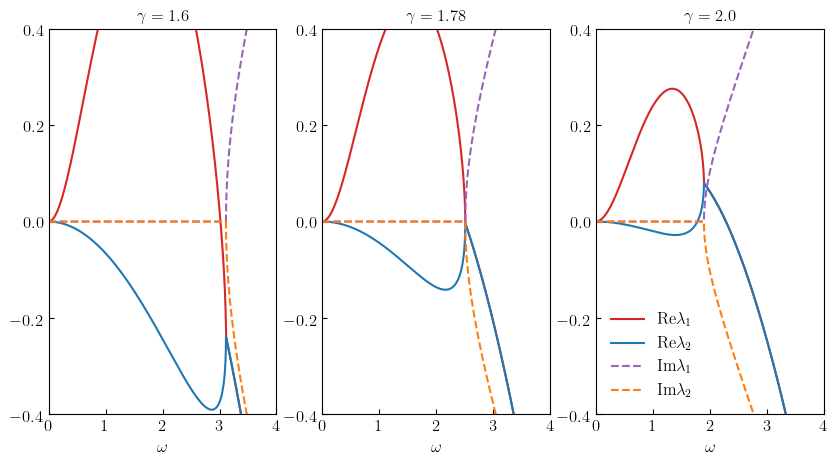

In [29]:

using PyPlot, LaTeXStrings
rc("text", usetex=true)
fig, axs = subplots(1,3,figsize=(10,5))

v0 = 7.5
font = 12

# # γ = 1.6
ϕ = 0.7939170040154222; γ = 1.6
ϕa = 1 - (1-ϕ)*γ
ax_lims = [0,4,-0.4,0.4]
plt_eigens!(axs[1],ϕ, ϕa, v0,ax_lims,font)
latex_string = latexstring("\$ \\gamma = $(γ) \$")
axs[1].set_title(latex_string, fontsize=font)


# # γ = 1.8 critical? 
ϕ = 0.816079927053443; γ = 1.78
ϕa = 1 - (1-ϕ)*γ
ax_lims = [0,4,-0.4,0.4]
plt_eigens!(axs[2],ϕ, ϕa, v0,ax_lims,font)
latex_string = latexstring("\$ \\gamma = $(γ) \$")
axs[2].set_title(latex_string, fontsize=font)

# # γ = 2.0
ϕ = 0.8425166653210528; γ = 2.0
ϕa = 1 - (1-ϕ)*γ
ax_lims = [0,4,-0.4,0.4]
plt_eigens!(axs[3],ϕ, ϕa, v0,ax_lims,font)
latex_string = latexstring("\$ \\gamma = $(γ) \$")
axs[3].set_title(latex_string, fontsize=font)

axs[3].legend(edgecolor = "white", fontsize=font)

# axis labels + abc 

display(fig)

In [2]:
ϕ = 0.8425166653210528; γ = 2.0
ϕa = 1 - (1-ϕ)*γ
ϕa,ϕ 

(0.6850333306421057, 0.8425166653210528)

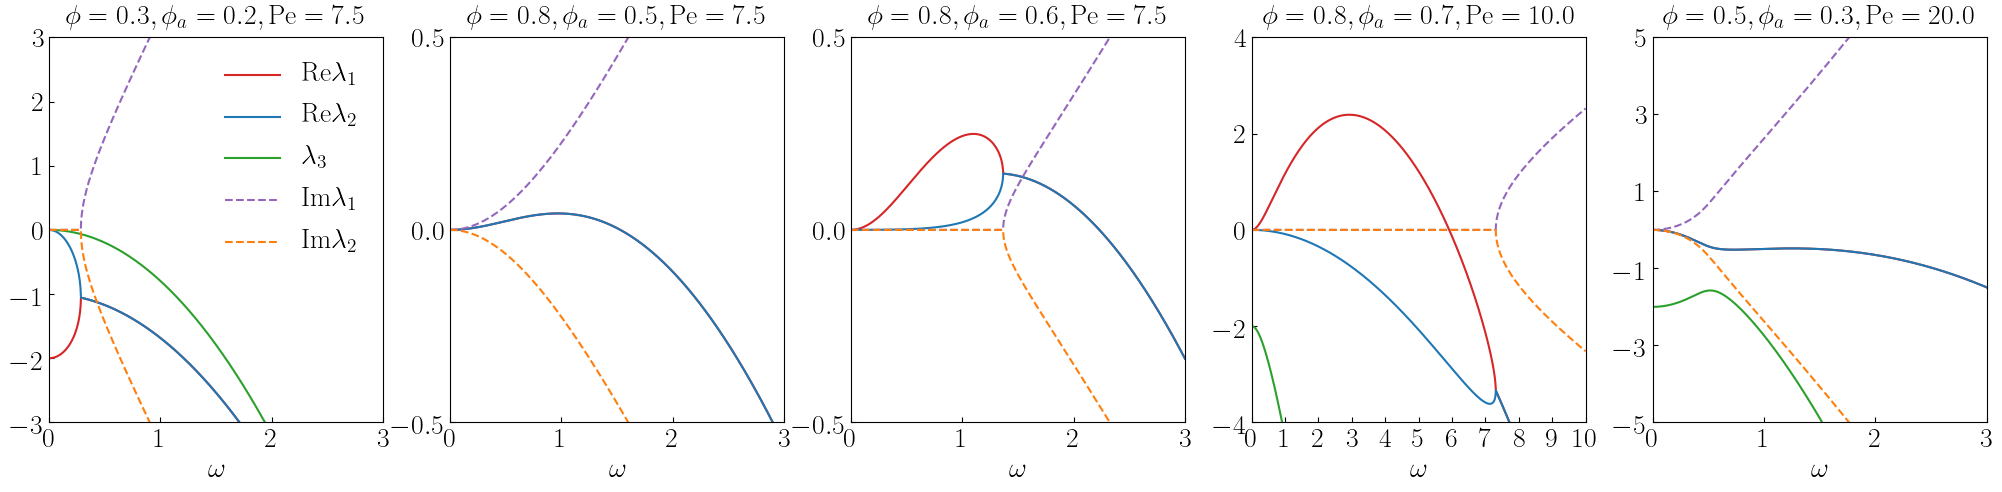

In [38]:
lims = [[0,3,-3,3] ,[0,3,-0.5,0.5],[0,3,-0.5,0.5],[0,10,-4,4],[0,3,-5,5]]
ϕas = [0.2, 0.5, 0.6, 0.7, 0.3]
ϕs  = [0.3, 0.8, 0.8, 0.8, 0.5]
vs  = [7.5, 7.5, 7.5, 10.0, 20.0]
incs = [1.0,0.5,0.5,2.0,2.0]

font = 20
using PyPlot, LaTeXStrings
fig, axs = subplots(1,5,figsize=(25,5))
rc("text", usetex=true)

for (i,(ax,ϕa,ϕ,v0,ax_lims,inc)) in enumerate(zip(axs,ϕas,ϕs,vs,lims,incs))
    if i ==1
        ws = collect(0.00:0.001:10)

    λs = relambw3.(ws; ϕa = ϕa, ϕ = ϕ, v = v0)
    ax.plot(ws,λs; color="tab:red", label = L"\mathrm{Re} \lambda_1")

    λs = relambw2.(ws; ϕa = ϕa, ϕ = ϕ, v = v0) #./ws.^2
    ax.plot(ws,λs; color="tab:blue", label = L"\mathrm{Re} \lambda_2")

    λs = relambw.(ws; ϕa = ϕa, ϕ = ϕ, v = v0) #./ws.^2#./ws.^2
    ax.plot(ws,λs; color="tab:green",label = L"\lambda_3")

    λs = imlambw.(ws; ϕa = ϕa, ϕ = ϕ, v = v0) #./ws.^2
    ax.plot(ws,λs; color="tab:purple", linestyle = "--", label = L"\mathrm{Im} \lambda_1")

    λs = imlambw2.(ws; ϕa = ϕa, ϕ = ϕ, v = v0) #./ws.^2
    ax.plot(ws,λs; color="tab:orange", linestyle = "--", label = L"\mathrm{Im} \lambda_2")
    
    ax.set_xlabel(L"\omega",fontsize=font)
    # ax.set_ylabel(L"\phi_p", fontsize=font)
    ax.yaxis.set_ticks(ax_lims[3]:inc:ax_lims[4])
    ax.xaxis.set_ticks(ax_lims[1]:1:ax_lims[2])
    ax.tick_params(direction = "in", labelsize = font)
    ax.axis(ax_lims)
    
    latex_string = latexstring("\$ \\phi = $(ϕ), \\phi_a = $(ϕa), \\mathrm{Pe} = $(v0) \$")
    ax.set_title(latex_string, fontsize=font)
    else
        plt_eigens!(ax,ϕ, ϕa, v0,ax_lims,font; inc=inc)
        latex_string = latexstring("\$ \\phi = $(ϕ), \\phi_a = $(ϕa), \\mathrm{Pe} = $(v0) \$")
        ax.set_title(latex_string, fontsize=font)
    end
end

axs[1].legend(edgecolor = "white", fontsize=font)

display(fig)

In [39]:
fig_name = "exeptional_point"
pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_eigen/$(fig_name)";
mkpath(pathname)
filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_eigen/$(fig_name)/Pe.pdf";
PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)

In [39]:
ϕp = 0.1
f(x) = is_stable_value(x, ϕp; Pe = 7.5)
ϕal, ϕar = find_zeros(f,(0,1-ϕp-1e-8))

2-element Vector{Float64}:
 0.4328561118978304
 0.8085950602394729

In [41]:
ϕas_left, ϕas_right, ϕps = return_spin(;Pe = 7.5, Δϕ = 0.05,ϕp_max = 0.4)

(Any[0.4523551719762685, 0.4328563610727917, 0.41498152292493434, 0.39926204616232264, 0.3866799373253014, 0.37948755799604716, 0.3863647553640894], Any[0.8647659027614091, 0.8085950601779368, 0.7511971750686776, 0.6920462478311262, 0.6301633493318779, 0.5632998581085141, 0.48277833273126153], Any[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35])

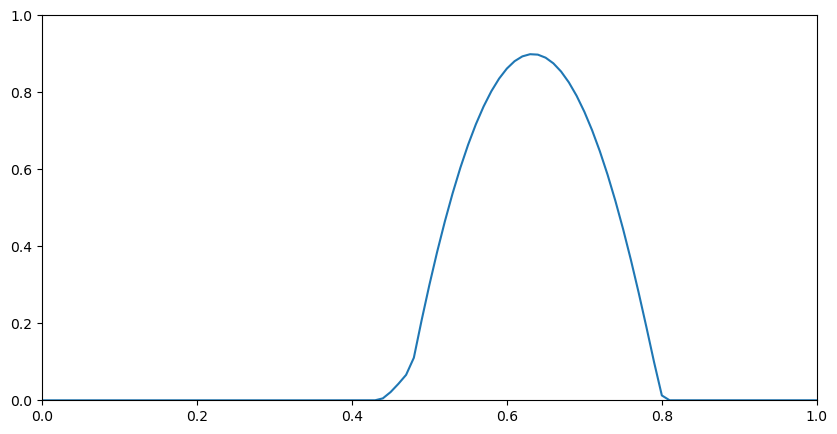

In [37]:
# ϕp = ϕ-ϕa

# using PyPlot
# fig, ax = subplots(1,1,figsize=(10,5))
# # ws = collect(0.00:0.0001:0.01)
# as = collect(0.00:0.01:1)
# ps = fill(ϕp,length(as))

# max_λs = is_stable_value.(as,ps; Pe = v0)
# ax.plot(as,max_λs)

ax.axis([0,1,0.0,1])
display(fig)

In [44]:
[x for x in max_λs if abs(x)<1e-2 && x >0]

1-element Vector{Float64}:
 0.0049959074206113955

In [46]:
using PyPlot, LaTeXStrings
fig, ax = subplots(1,1,figsize=(5,5))
plot_phase(fig, ax, v0, 12; Lxs = [],Δϕ=0.01)
display(fig)